<a href="https://colab.research.google.com/github/Rohan-1103/Data-Science/blob/main/task_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/insurance_data.csv')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
# dropping index duplication
df.set_index('index')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
df.drop(columns='index', inplace=True)
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


### General Dataset analysis
- Small dataset -> 1340 records and 10 Columns(after dropping index column)
- Minimal Null values -> 5 in age, 2 in region

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


### Categorizing columns
  - **Numerical columns:** age, bmi, bloodpressure, claim, children
  - **Categorical columns:** gender, diabetic, smoker, region
  - **Miscellaneous columns:** PatientID


### Univariate Analysis

#### Numerical Columns:
- age:
  - Min = 18, Max = 60, Mean = 38, Median = 38, Mode = 43
  - 5 Missing values in 1340 values.
  - Kde plot shows a bimodal distribution, so using mean and median will not be the best way to deal with the missing values.
  - We can use mode
  - No outliers found

- bmi:
  - No missing values in bmi
  - Min = 16, Max = 53.1, Mean = 30.66, Median = 30.40
  - Slightly skewed distribution due to outliers, 0.28597245020808587
  - Few outliers on the higher end of the values:
    - Handling using natural log transformation made it negatively skewed with same magnitude.
    - Applied square root transformation which gave better and more symmetric distribution with skewness - 0.017189507954888536
    
- bloodpressure
- claim
- children

In [7]:
# Checking null values
df['age'].isna().sum()

np.int64(5)

In [8]:
# Percentage of missing values
df['age'].isna().sum()/len(df['age'])*100

np.float64(0.3731343283582089)

<Axes: ylabel='Frequency'>

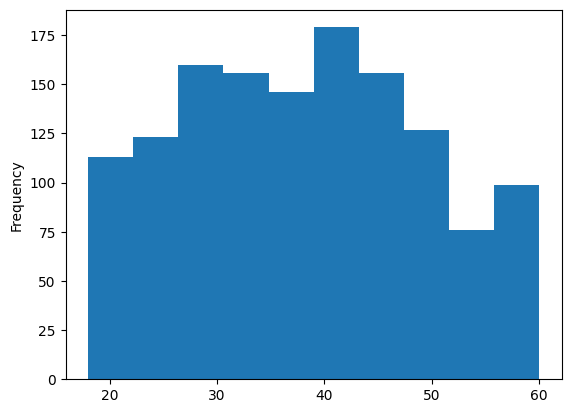

In [9]:
# Visualizing age column to find the best way to fill missing values
df['age'].plot(kind = 'hist')

<Axes: ylabel='Density'>

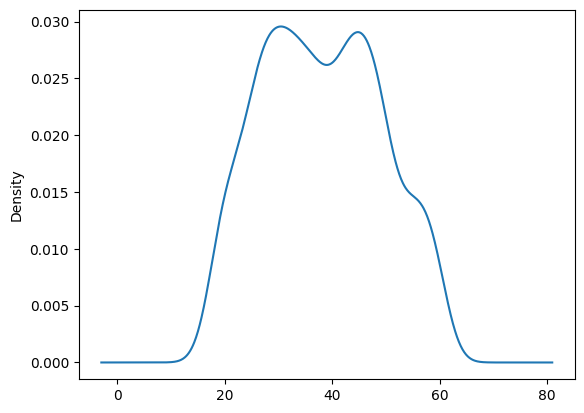

In [10]:
df['age'].plot(kind = 'kde')

In [11]:
df['age'].value_counts().sort_values()

,count
age,
53.0,15
24.0,16
18.0,16
58.0,17
51.0,17
54.0,17
21.0,18
56.0,18
52.0,18


In [12]:
df['age'].mode()

,age
0,43.0


In [13]:
# Using mode to fill the missing values of the age column
# df['age'].fillna(df['age'].mode())
df['age'] = df['age'].fillna(df['age'].mode()[0])

🔍 Why are there two names then?
- `isnull()` comes from older Pandas versions (inspired by R language).
- `isna()` was introduced later to be more consistent with NumPy (np.isnan).

✔ So which one should you use?

➡️ `isna()` is now recommended, as it matches other functions like:
- `fillna()`
- `dropna()`

In [14]:
df['age'].isna().sum()

np.int64(0)

0.10904878460145875


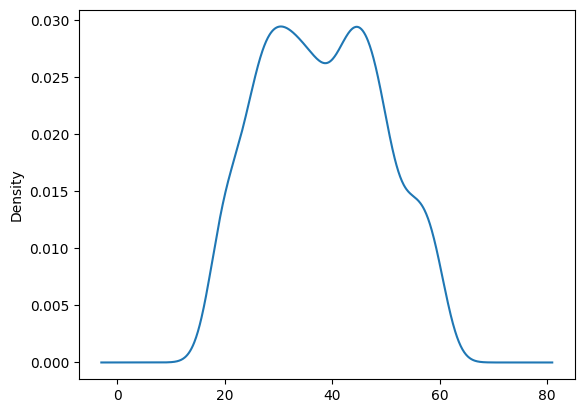

In [15]:
df['age'].plot(kind = 'kde')
print(df['age'].skew())

In [16]:
df['age'].describe()

,age
count,1340.000000
mean,38.097015
std,11.086239
min,18.000000
25%,29.000000
50%,38.000000
75%,47.000000
max,60.000000


<Axes: >

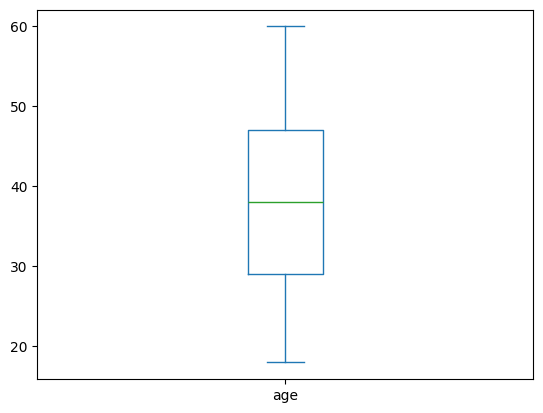

In [17]:
df['age'].plot(kind = 'box')

<Axes: >

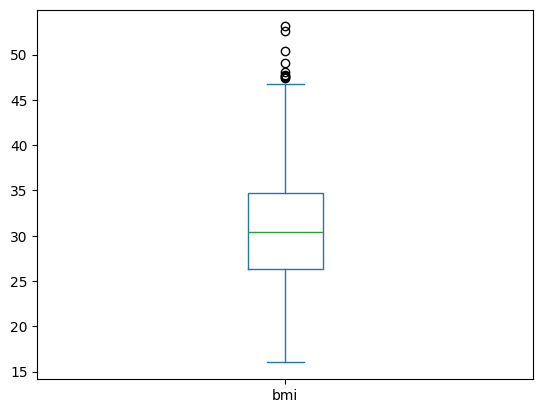

In [18]:
df['bmi'].plot(kind = 'box')

0.28597245020808587


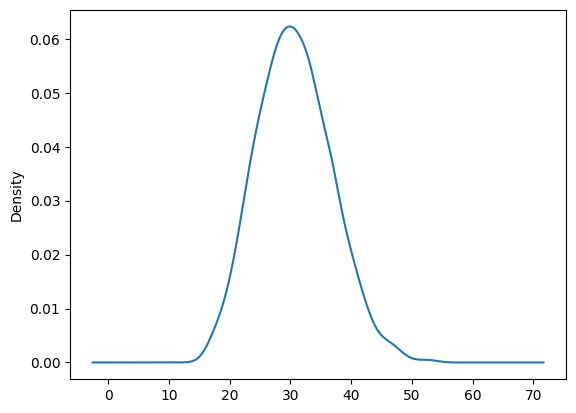

In [19]:
df['bmi'].plot(kind = 'kde')
print(df['bmi'].skew())

In [20]:
# Checking whether outliers are true or not
df[df['bmi'] > 46]

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
190,191,28.0,male,46.5,94,No,1,No,southeast,2927.06
331,332,43.0,male,46.5,83,Yes,2,No,southeast,4686.39
464,465,20.0,male,46.5,89,No,3,No,southeast,6435.62
579,580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
682,683,27.0,female,46.1,106,No,1,No,southeast,9549.57
696,697,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33


In [26]:
# applying log transformation to handle outliers
df['bmi_transformed'] = np.sqrt(df['bmi'])
df

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_transformed
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,4.816638
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,5.486347
2,3,43.0,male,33.3,82,Yes,0,No,southeast,1135.94,5.770615
3,4,43.0,male,33.7,80,No,0,No,northwest,1136.40,5.805170
4,5,43.0,male,34.1,100,No,0,No,northwest,1137.01,5.839521
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,5.958188
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,6.172520
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,5.873670
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,5.513620


<Axes: >

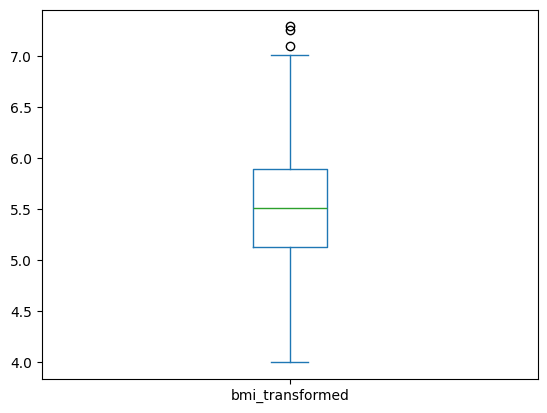

In [27]:
df['bmi_transformed'].plot(kind = 'box')

<Axes: >

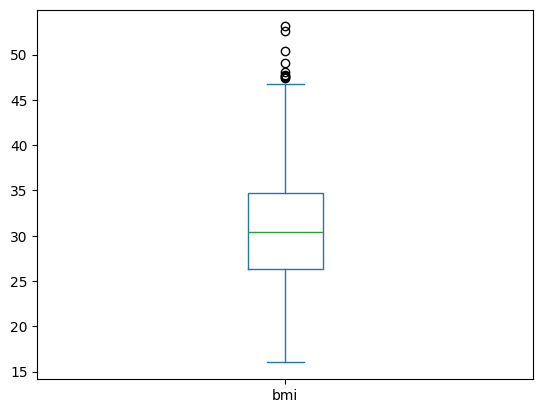

In [28]:
df['bmi'].plot(kind = 'box')

0.017189507954888536


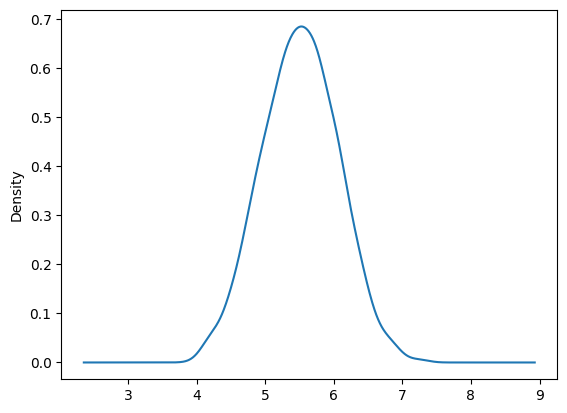

In [29]:
df['bmi_transformed'].plot(kind = 'kde')
print(df['bmi_transformed'].skew())